In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('TAIPEI_diabetes.csv')
df.head(5)
dff = df.copy()

In [3]:
df_mesurments = df.iloc[:, 1:-1] #exclude the <PatientID> and the <Diabetic> columns because they will not provide any additional information.
df_mesurments.describe() # Summary statistics for numerical variables


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


In [4]:
df_mesurments.info()  # Check column names, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             15000 non-null  int64  
 1   PlasmaGlucose           15000 non-null  int64  
 2   DiastolicBloodPressure  15000 non-null  int64  
 3   TricepsThickness        15000 non-null  int64  
 4   SerumInsulin            15000 non-null  int64  
 5   BMI                     15000 non-null  float64
 6   DiabetesPedigree        15000 non-null  float64
 7   Age                     15000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


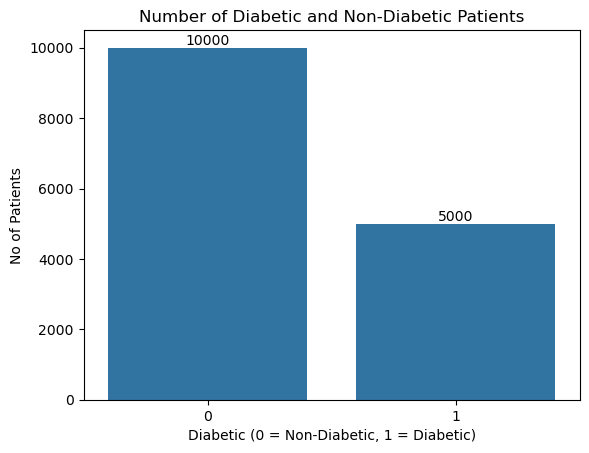

In [5]:
ax = sns.countplot(df, x='Diabetic', color='lightblue')
for container in ax.containers:
    ax.bar_label(container, fmt='%d') 
sns.countplot(df, x='Diabetic')
plt.title('Number of Diabetic and Non-Diabetic Patients')
plt.xlabel('Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('No of Patients')
plt.show()

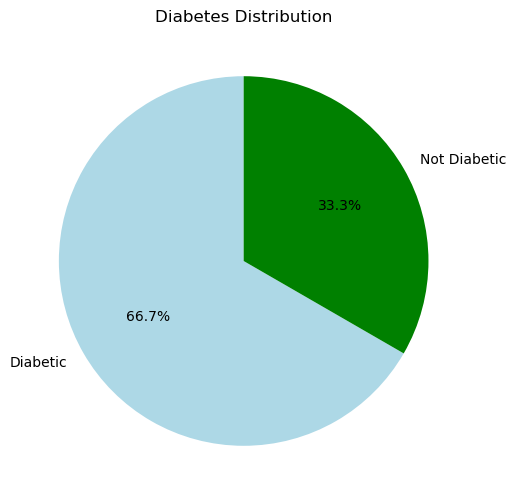

In [6]:
patients_df = df["Diabetic"]
counts = patients_df.value_counts()
labels = ['Diabetic', 'Not Diabetic']
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'green'], startangle=90)
plt.title('Diabetes Distribution')
plt.show()

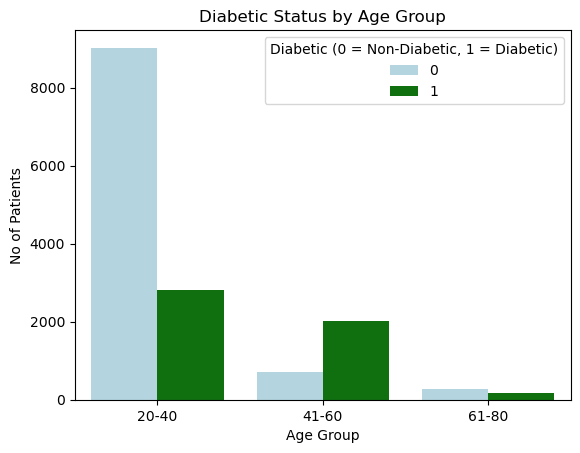

In [7]:
# Create age bins
bins = [20, 40, 60, 80]  # Define age ranges
labels = ['20-40', '41-60', '61-80']
dff['AgeGroup'] = pd.cut(dff['Age'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(dff,x='AgeGroup', hue='Diabetic', palette=['lightblue', 'green'])
plt.title('Diabetic Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()

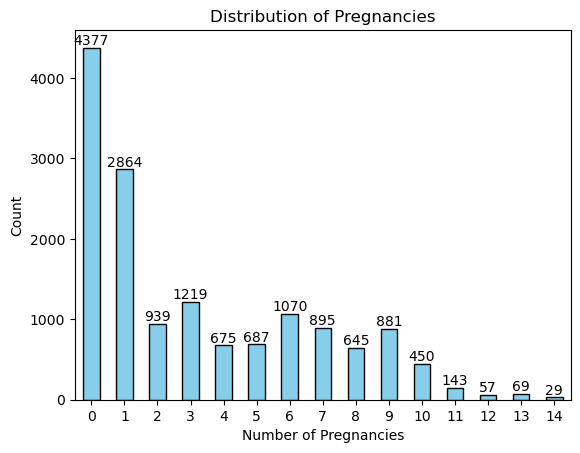

In [8]:
# Plot of number Women based on how many times they have been pregnant .

preg_count = df['Pregnancies'].value_counts().sort_index()
preg_count.plot(kind='bar', color='skyblue', edgecolor='black')

 # Add labels and title
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.title('Distribution of Pregnancies')
plt.xticks(rotation=0) 
for i, value in enumerate(preg_count):
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

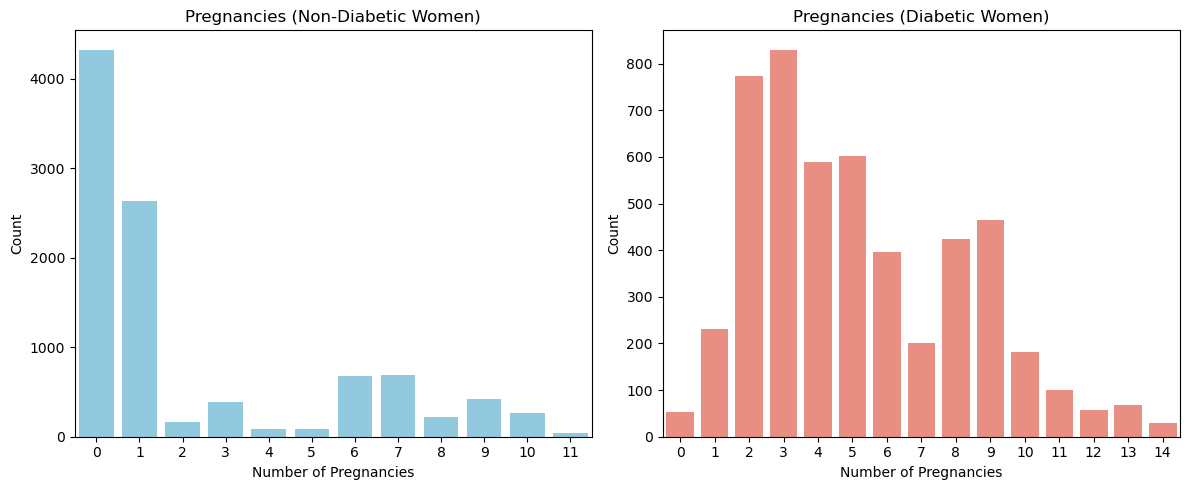

In [29]:
diabetic = df[df['Diabetic'] == 1]
non_diabetic = df[df['Diabetic'] == 0]
# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot for non-diabetic women
plt.subplot(1, 2, 1)
sns.countplot(data=non_diabetic, x='Pregnancies', color='skyblue')
plt.title('Pregnancies (Non-Diabetic Women)')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')

# Plot for diabetic women
plt.subplot(1, 2, 2)
sns.countplot(data=diabetic, x='Pregnancies', color='salmon')
plt.title('Pregnancies (Diabetic Women)')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Threshold Effect:
The plots likely show that diabetes prevalence increases significantly in women with ≥2 pregnancies compared to those with 0-1 pregnancies.

------------------------

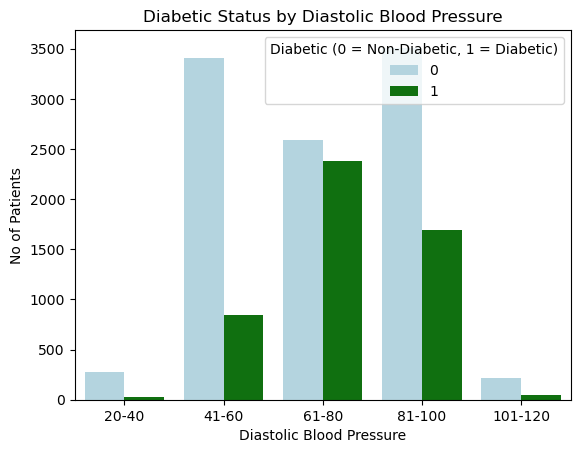

In [9]:
# Create DiastolicBloodPressure bins
bins = [20, 40, 60, 80, 100, 120]  # Define DiastolicBloodPressure ranges
labels = ['20-40', '41-60', '61-80', '81-100', '101-120']
dff['DiastolicBloodPressure'] = pd.cut(dff['DiastolicBloodPressure'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=dff, x='DiastolicBloodPressure', hue='Diabetic', palette = ['lightblue', 'green'])
plt.title('Diabetic Status by Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


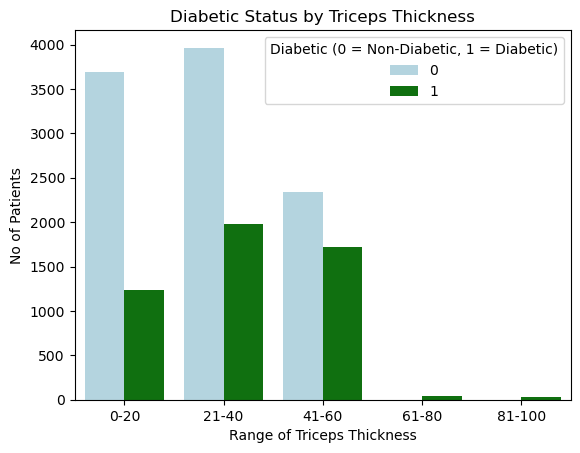

In [14]:
# Create TricepsThickness bins
bins = [0, 20, 40, 60, 80, 100]  # Define DiastolicBloodPressure ranges
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
dff['TricepsThicknessBins'] = pd.cut(df['TricepsThickness'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=dff, x='TricepsThicknessBins', hue='Diabetic', palette = ['lightblue', 'green'])
plt.title('Diabetic Status by Triceps Thickness')
plt.xlabel('Range of Triceps Thickness')
plt.ylabel('No of Patients')
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()

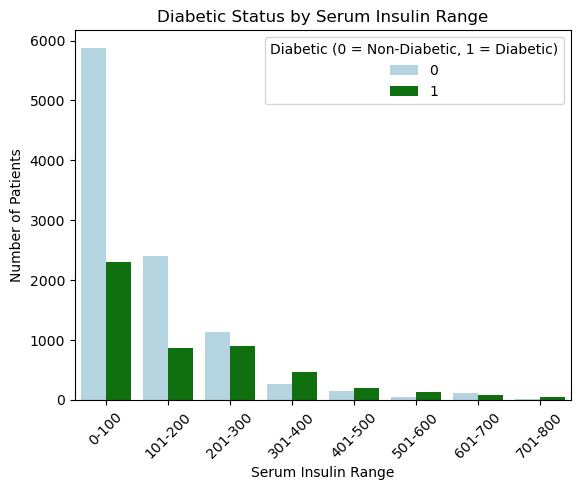

In [15]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800']
dff['SerumInsulinRange'] = pd.cut(df['SerumInsulin'], bins=bins, labels=labels)

sns.countplot(data=dff, x='SerumInsulinRange', hue='Diabetic', palette =['lightblue','green'])
plt.title('Diabetic Status by Serum Insulin Range')
plt.xlabel('Serum Insulin Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()


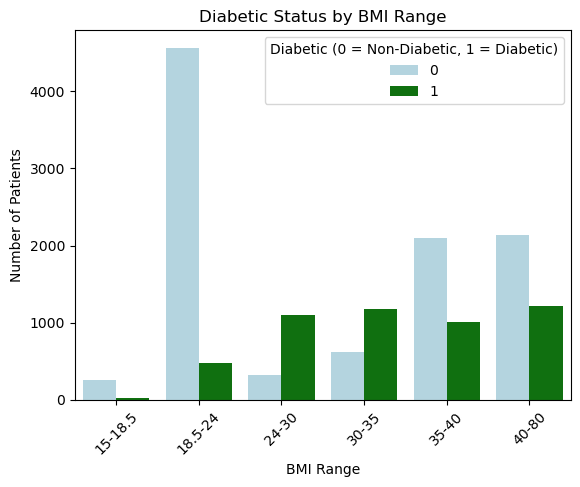

In [16]:
bins = [15, 18.5,24,30,35,40,80]  # Adjust bins as needed
labels = ['15-18.5','18.5-24','24-30','30-35','35-40','40-80']
dff['BMIRange'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Plot the count plot with hue
sns.countplot(data=dff, x='BMIRange', hue='Diabetic', palette =['lightblue','green'])
plt.title('Diabetic Status by BMI Range')
plt.xlabel('BMI Range')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Diabetic (0 = Non-Diabetic, 1 = Diabetic)')
plt.show()

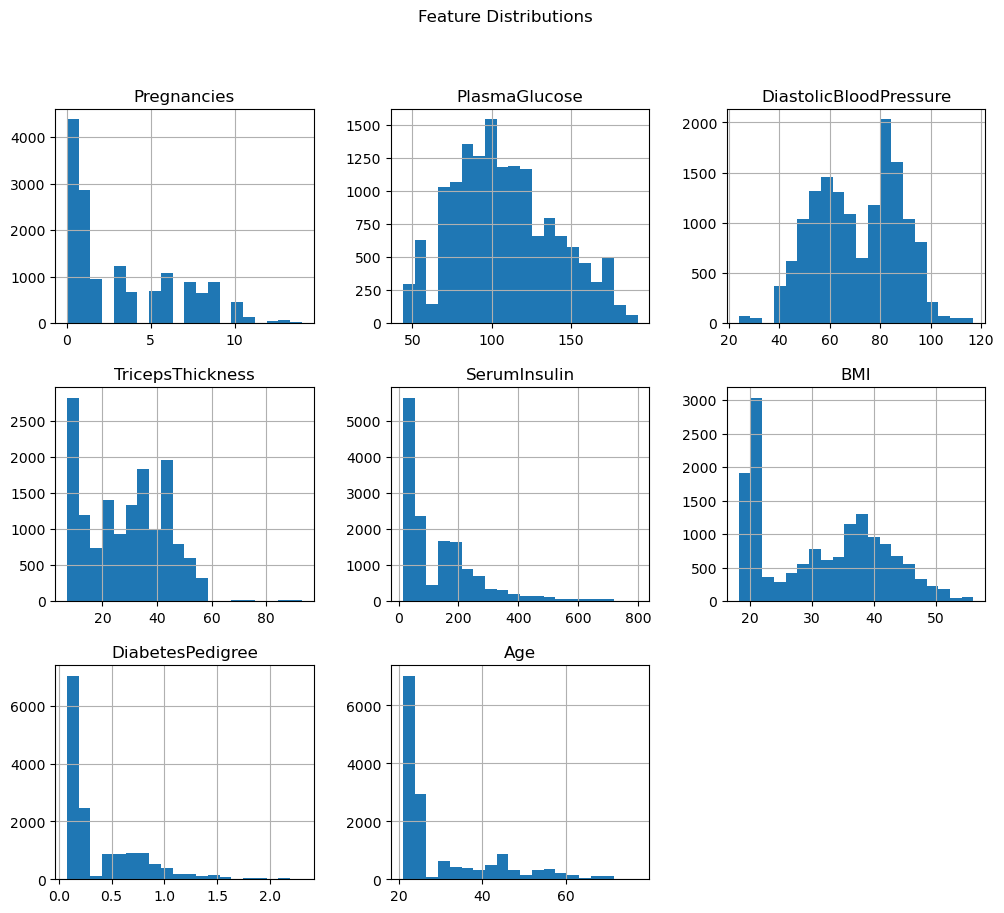

In [18]:
# Histogram for all features
df_mesurments.hist(bins=20, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()


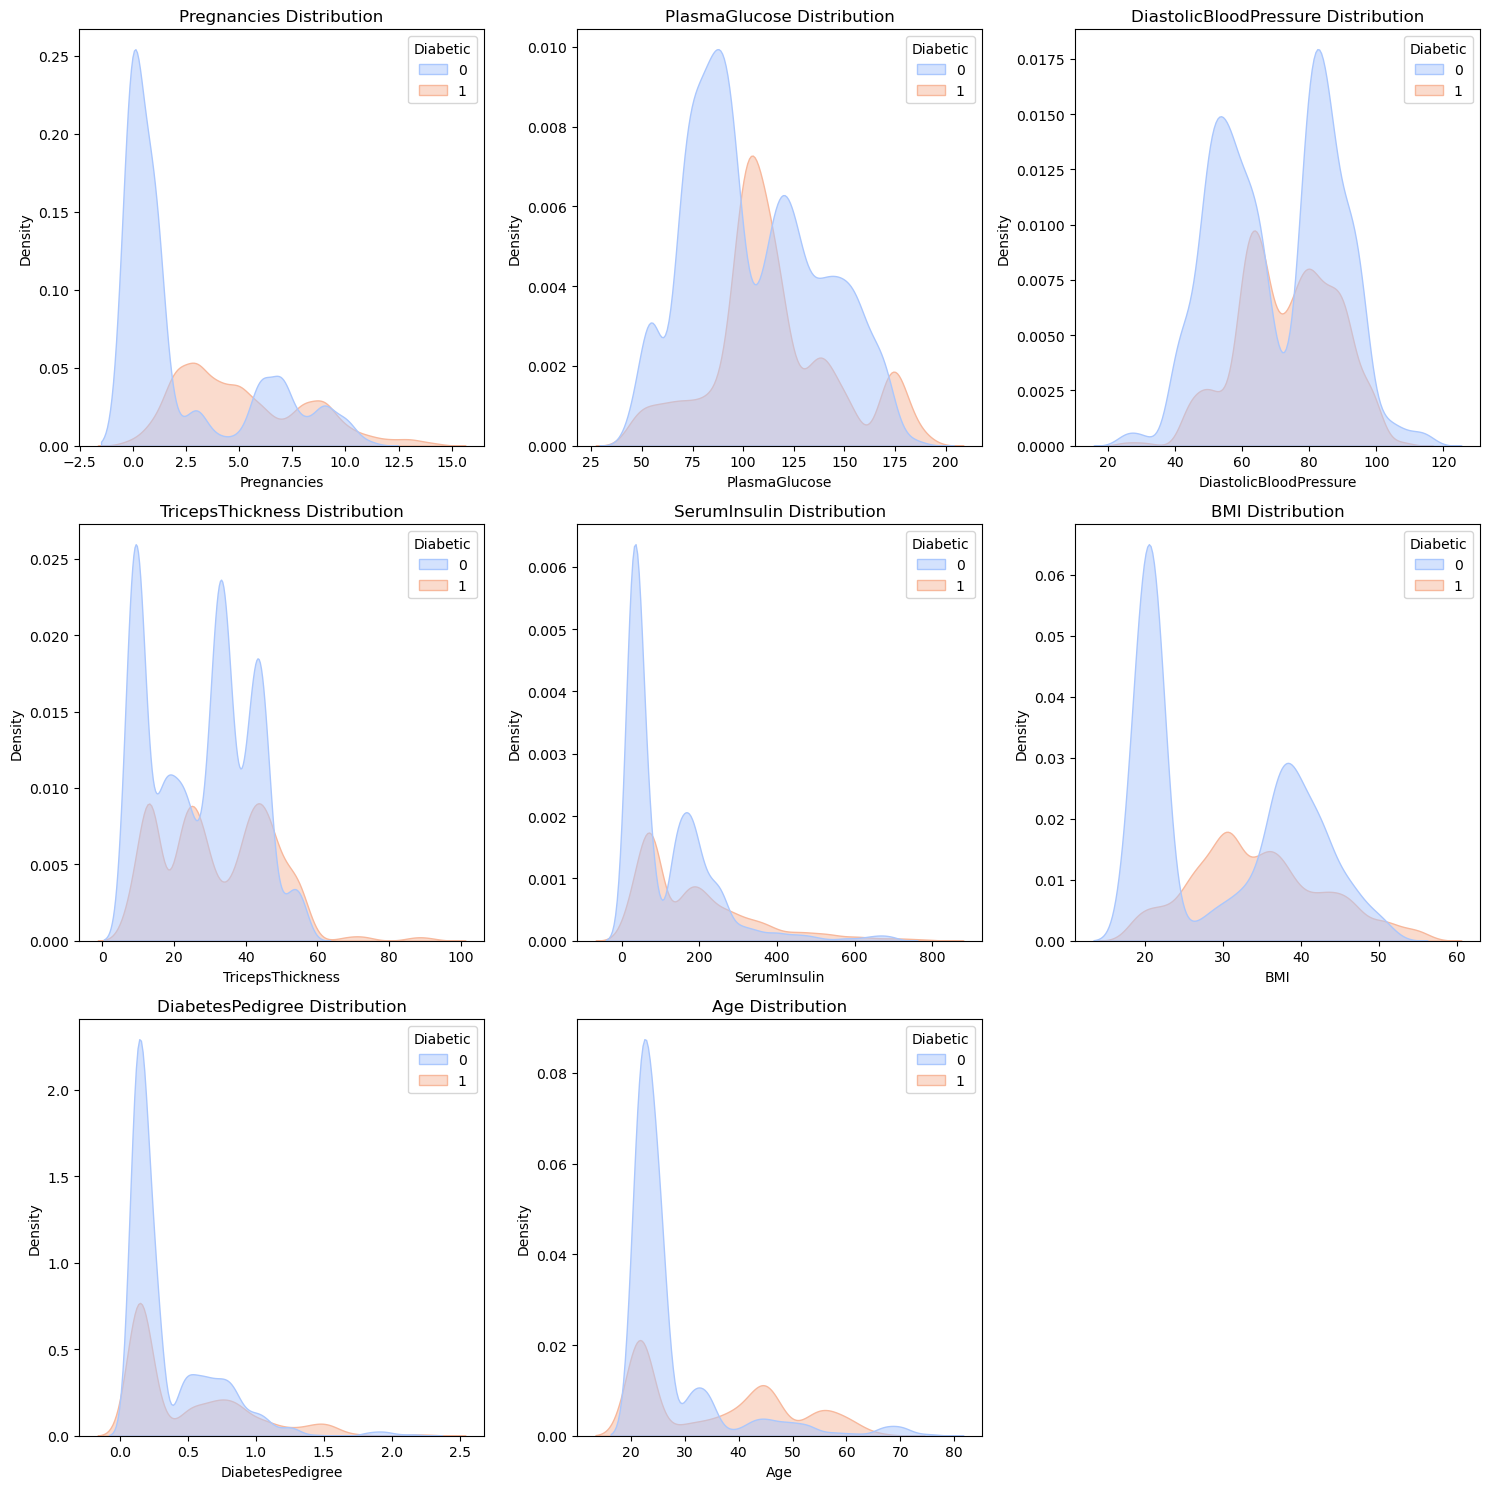

In [21]:
import math
num_features = len(df_mesurments.columns)
cols = 3 
rows = math.ceil(num_features / cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
axes = axes.flatten() 

for i, feature in enumerate(df_mesurments):
    sns.kdeplot(x=df[feature], hue=df["Diabetic"], fill=True, palette="coolwarm", alpha=0.5, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"{feature} Distribution")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---------------------------------------------

## Observations and Interpretations 
#### 1. Pregnancies Distribution
Observation : 
> - Diabetic women (1) tend to have higher pregnancies counts (right-skewed), with a peak around 2–5 pregnancies.
> - Non-diabetic women (0) show a sharper peak near 0–2 pregnancies, suggesting fewer pregnancies on average .

Interpretation : 
> - Higher pregnancy counts might correlate with increased diabetes risk, possibly due to gestational diabetes history or metabolic changes post-pregnancy.


#### 2. PlasmaGlucose Distribution
Observation : 
> - Diabetic women (1) have a right-shifted distribution, peaking around 125–150 mg/dL, indicating higher fasting glucose levels.
> - Non-diabetic women (0) peak near 75–100 mg/dL, within normal ranges.

Interpretation : 
> - Elevated glucose levels are a clear marker for diabetes, aligning with clinical thresholds (normal: <100 mg/dL; diabetic: ≥126 mg/dL).

#### 3. DiastolicBloodPressure Distribution : 
Observation : 
> - Both groups show similar distributions, but diabetic women (1) have a slightly higher density around 70–80 mmHg.
> - Non-diabetic women (0) peak near 60–70 mmHg.

Interpretation :
> - While differences are subtle, diabetic patients may trend toward higher blood pressure, a known comorbidity of diabetes.

#### 4. TricepsThickness Distribution : 
Observation : 
> - Diabetic women (1) show a higher density at thicker triceps measurements (peaking around 20–40 mm), suggesting greater subcutaneous fat.
> - Non-diabetic women (0) have a sharper peak at lower thickness values (near 10–30 mm).

Interpretation :
> - Increased triceps skinfold thickness (a proxy for body fat) may correlate with diabetes risk, aligning with obesity as a known diabetes factor.

#### 5. Serum Insulin Distribution
Observation : 
> - Diabetic women (1) exhibit higher insulin levels (right-skewed distribution), peaking around 100–200 μU/mL, indicating insulin resistance.> - Non-diabetic women (0) show lower insulin levels, concentrated below 50 μU/mL.

Interpretation : 
> - Elevated insulin levels in diabetic patients suggest insulin resistance, a hallmark of Type 2 diabetes.



#### 6. BMI Distribution
Observation : 
> - Diabetic women (1) have a right-shifted BMI distribution, with a peak around 30–35 kg/m² (obesity range).
> - Non-diabetic women (0) peak near 25–30 kg/m² (overweight/healthy range).

Interpretation : 
> - Higher BMI strongly associates with diabetes, reinforcing the link between obesity and metabolic dysfunction.

#### 7. DiabetesPedigree Distribution (Genetic Risk Score)
Observation : 
> - Diabetic patients (1) show a right-skewed distribution, with higher density at elevated pedigree scores (>0.5), peaking around 0.8-1.2.
> - Non-diabetic individuals (0) cluster at lower scores (<0.4), indicating weaker family history.

Interpretation :  
> - People with a strong family history of diabetes are twice as likely to develop it. A 'DiabetesPedigree' score measures this family risk—higher scores mean higher danger.

#### 8. Age Disrtibution : 
Observation : 
> - Diabetic women (1) peak at older ages (50-60 years), with a wider spread.
> - Non-diabetic women (0) are concentrated in younger ages (20-40 years).

Interpretation : 
> - Age is a non-modifiable risk factor. The sharp rise post-40 aligns with declining insulin sensitivity.

------------------------------------------------------------------------------------

In [19]:
correlations = df.corr()
diabetic_corr = correlations['Diabetic'].sort_values(ascending=False)

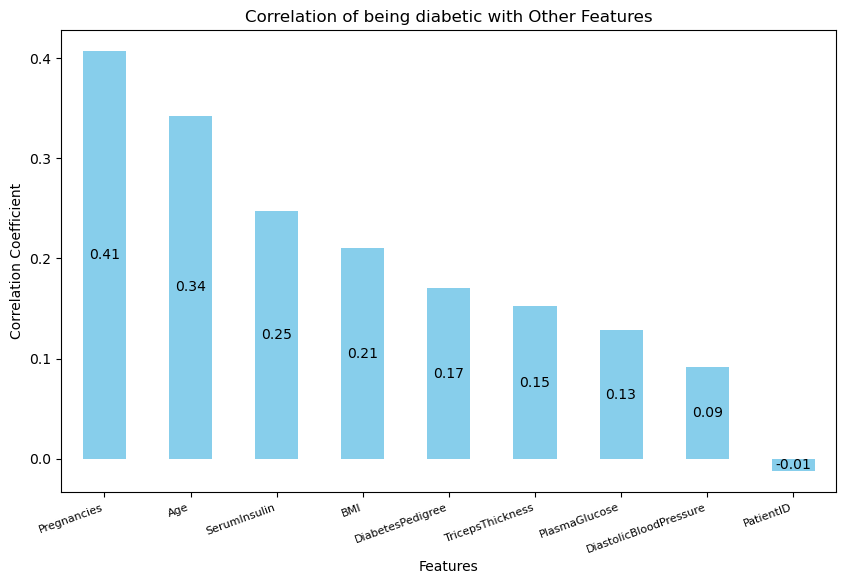

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
diabetic_corr.drop('Diabetic').plot(kind='bar', color='skyblue', ax=ax)
ax.set_title("Correlation of being diabetic with Other Features")
ax.set_ylabel("Correlation Coefficient")
ax.set_xlabel("Features")

for i, value in enumerate(diabetic_corr.drop('Diabetic')):
    rounded_value = round(value, 2)
    bar = ax.patches[i]
    bar_height = bar.get_height()
    bar_x = bar.get_x() + bar.get_width() / 2
    ax.text(bar_x, bar_height / 2, str(rounded_value), ha='center', va='center', fontsize=10, color='black')
    
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right', fontsize=8)
plt.show()

----------------------------------------------

#### Data Split 

We are going to work with 80-20 split :
> - 80% of the dataset will be used for training models.
> - 20% of the dataset will be used for testing models predictions.

We will now prepare our data for use in the various models we plan to test. This preparation includes addressing issues such as data imbalances, handling outliers, and ensuring the dataset is clean and ready for analysis.

#### Imbalances
As we saw earlier in univariate analysis, the diabetes class is greatly imbalanced towards a negative diagnosis. Using a model without fixing this imbalance would make it biased towards the majority class. It can also affect many metrics like precision, accuracy, F1 score, and recall. Let's see what each of these metrics mean.

Understanding metrics
Let's first define the following terms as they are used in the formulas for our metrics:

> * True positive (TP): When the model correctly predicts that a condition or characteristic is present.
> * True negative (TN): When the model correctly predicts that a condition or characteristic is not present.
> * False positive (FP): When the model incorrectly predicts that a condition or attribute is present when it is actually not.
> * False negative (FN): When the model incorrectly predicts that a condition or attribute is not present when it actually is.

#### Metrics:

> * Accuracy: A metric that indicates how often a machine learning model makes correct predictions. It is calculated by dividing the number of correct predictions by the total number of predictions made.
> * Precision: A metric that evaluates how accurately a machine learning model identifies the positive class. It is calculated by dividing the number of true positive predictions by the total number of positive predictions (true positives + false positives).
> * Recall: A metric that measures how well a machine learning model identifies positive instances. It is calculated by dividing the number of true positives by the total number of actual positive samples (true positives + false negatives). Recall reflects the model’s ability to capture all positive cases in the dataset. 
> * F1-score: A metric that balances precision and recall by computing their harmonic mean. The relative importance of both metrics is equal in the F1 score calculation. The best possible F1 score is 1, indicating perfect model performance with all predictions being correct. The worst possible F1 score is 0, meaning the model did not correctly classify any positive instances.

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Model : 

In [26]:
target = "Diabetic" 
X = df_mesurments
y = df[target]

#### Identify numerical and categorical features

In [27]:

num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object", "category"]).columns
print(num_features)
print(cat_features)

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')
Index([], dtype='object')


#### Preprocessing Data 

In [28]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),  
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)  
])

#### Data Splitting

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

#### Train Mode and Testing results 

Hyperparameter tuning is the process of finding the optimal set of hyperparameters that maximize the model's performance.

* Parameter Grid Definition:

param_grid is a dictionary where each key is a hyperparameter of the Random Forest model, and the corresponding value is a list of settings to be tested for that hyperparameter.

* The hyperparameters being tuned are:

1.  n_estimators: In a Random Forest, this parameter specifies the number of  estimators in the ensemble model. It determines how many individual decision trees will be built and combined to make predictions.

2. Max depth:  This parameter controls the maximum depth of each individual tree in the Random Forest. It limits how deep a tree can grow.

3. min_samples_split: This parameter specifies the minimum number of samples required to split an internal node.

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

random_forest =  GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
random_forest.fit(X_train, y_train)

# Predictions
y_pred = random_forest.predict(X_test)

print("**********************************************")
print("Best Parameters:", random_forest.best_params_)
print("Best Accuracy:", random_forest.best_score_)

print("**********************************************")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



#### Best Parameters:
The model performed best with these settings:

- max_depth: None.
- min_samples_split: 2 (a node must have at least 2 samples to split).
- n_estimators': 200

-----------------------------------------------------------------------

#### Classification Report:
Class 0 (Non-Diabetic):
- Precision: 94% of predicted non-diabetic cases were correct.
- Recall: 96% of actual non-diabetic cases were correctly identified.
- F1-Score: 95% (a balance between precision and recall).


Class 1 (Diabetic):
- Precision: 92% of predicted diabetic cases were correct.
- Recall: 89% of actual diabetic cases were correctly identified.
- F1-Score: 90% (a balance between precision and recall.

-----------------------------------------------------------------------


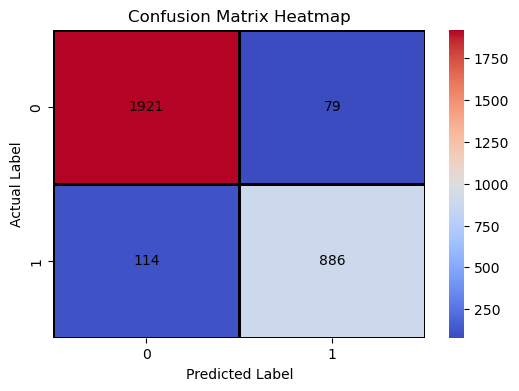

In [38]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=1, linecolor='black',  annot_kws={"color": "black"})  
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

- True positive (TP): 1921 . the model correctly predicts that a woman is diabetic when she actually is . 
- True negative (TN): 886 .  the model correctly predicts that a woman is not diabetic when she actually is . 
- False positive (FP): 79  . the model incorrectly predicts that a woman is diabetic when she is actually not.
- False negative (FN): 114 . the model incorrectly predicts that a woman is not diabetic when she actually is.

-----------------------------

------------------------------

# Decision Tree Model 

## What is the decision tree 

" A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes. " - IBM

## How it works 

" Decision tree learning employs a divide and conquer strategy by conducting a greedy search to identify the optimal split points within a tree. This process of splitting is then repeated in a top-down, recursive manner until all, or the majority of records have been classified under specific class labels. " - IBM


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Hyper parameters identififation 
Hyperparameter tuning is the process of finding the optimal set of hyperparameters that maximize the model's performance.

* Parameter Grid Definition:

> - param_grid is a dictionary where each key is a hyperparameter of the Decision Tree model, and the corresponding value is a list of settings to be tested for that hyperparameter.

* The hyperparameters being tuned are:

> -  max_depth: The maximum depth of the tree. It controls how deep the tree can grow. Deeper trees can model more complex patterns but may lead to overfitting. The values being tested are [10, 20, 30, None], where None means the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
>  - min_samples_split: The minimum number of samples required to split an internal node. The values being tested are [2, 5, 10]. Higher values prevent the model from learning overly specific patterns (overfitting).
>  - min_samples_leaf: The minimum number of samples required to be at a leaf node. The values being tested are [1, 2, 4]. This parameter also helps in controlling overfitting by ensuring that each leaf has a minimum number of samples.

## Decision Tree 

In [40]:
param_grid_dt = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [41]:
decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=42) , param_grid= param_grid_dt, cv=5, n_jobs=-1, verbose = 2, scoring='accuracy')
decision_tree.fit(X_train, y_train)

# Predections : 
y_pred = decision_tree.predict(X_test)


print("Best Parameters:", decision_tree.best_params_)
print("Best Accuracy:", decision_tree.best_score_)
print("**********************************************")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy: 0.9119999999999999
Accuracy: 0.9093333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2000
           1       0.88      0.85      0.86      1000

    accuracy                           0.91      3000
   macro avg       0.90      0.89      0.90      3000
weighted avg       0.91      0.91      0.91      3000

**********************************************
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy: 0.9119999999999999


## Best Parameters:
The model performed best with these settings:

- max_depth: 10 (the tree is limited to 10 levels deep).
- min_samples_leaf: 2 (each leaf node must have at least 2 samples).
- min_samples_split: 2 (a node must have at least 2 samples to split).

-----------------------------------------------------------------------

## Classification Report:
Class 0 (Non-Diabetic):
- Precision: 93% of predicted non-diabetic cases were correct.
- Recall: 94% of actual non-diabetic cases were correctly identified.
- F1-Score: 93% (a balance between precision and recall).



Class 1 (Diabetic):
- Precision: 88% of predicted diabetic cases were correct.
- Recall: 85% of actual diabetic cases were correctly identified.
- F1-Score: 86% (a balance between precision and recall.


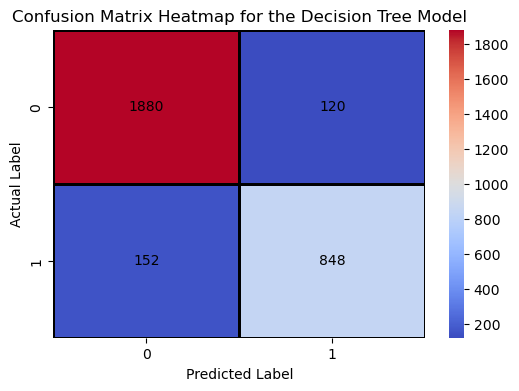

In [42]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix_dt, annot=True, fmt="d", cmap="coolwarm", linewidths=1, linecolor='black',  annot_kws={"color": "black"})  
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix Heatmap for the Decision Tree Model")
plt.show()

- True positive (TP): 1880 . the model correctly predicts that a woman is diabetic when she actually is . 
- True negative (TN): 848 .  the model correctly predicts that a woman is not diabetic when she actually is . 
- False positive (FP): 120  . the model incorrectly predicts that a woman is diabetic when she is actually not.
- False negative (FN): 152 . the model incorrectly predicts that a woman is not diabetic when she actually is.